In [ ]:
import os
import xarray as xr
import geopandas as gpd
import rioxarray

# Paths
input_dir = 'Data/Data for SPI/Monthly Rainfall for SPI'
output_dir = 'Data/Data for SPI/Region Separated Monthly Rainfall/Brigalow_Belt'
geojson_path = 'QLD Bio Regions/QLD_BioRegions_Separated/Brigalow_Belt.geojson'  # path to your QLD geojson file

# save_filename = output_dir.split('/')[-1]  # Extract the last part of the output directory for naming

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Load the QLD boundary
qld_gdf = gpd.read_file(geojson_path)
qld_gdf = qld_gdf.to_crs("EPSG:4326")  # ensure it matches NetCDF projection (WGS84)

# Loop through .nc files
for filename in os.listdir(input_dir):
    if filename.endswith(".nc"):
        filepath = os.path.join(input_dir, filename)
        try:
            # Open dataset with rioxarray
            ds = xr.open_dataset(filepath)
            variable_name = list(ds.data_vars)[0]
            data = ds[variable_name]

            # Ensure it's georeferenced
            data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
            data.rio.write_crs("EPSG:4326", inplace=True)

            # Clip to QLD geometry
            clipped = data.rio.clip(qld_gdf.geometry, qld_gdf.crs, drop=True)

            # Save to output
            output_filename = os.path.splitext(filename)[0] + "_" + output_dir.split('/')[-1] + "_qld.nc"
            output_path = os.path.join(output_dir, output_filename)
            clipped.to_netcdf(output_path)

            print(f"✅ Cropped {filename} to QLD and saved to {output_path}")

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\Q'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_36908\2157622643.py:7: SyntaxWarning: invalid escape sequence '\D'
  input_dir = 'Data\Data for SPI\Rainfall 2000\Monthly Rainfall'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_36908\2157622643.py:8: SyntaxWarning: invalid escape sequence '\D'
  output_dir = 'Data\Data for SPI\Rainfall 2000\Region Rainfall'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_36908\2157622643.py:9: SyntaxWarning: invalid escape sequence '\Q'
  geojson_path = 'Data\QLD Bio Regions\QLD_BioRegions_Separated\Cape_York_Peninsula.geojson'  # path to your QLD geojson file


❌ Error processing 2000.monthly_rain.nc: [Errno 13] Permission denied: 'c:\\Users\\Jspch\\OneDrive\\Desktop\\ConDrought Implementation\\Implementation CD Version 05\\Data\\Data for SPI\\Rainfall 2000\\Region Rainfall\\2000.monthly_rain_Data\\Data for SPI\\Rainfall 2000\\Region Rainfall_qld.nc'


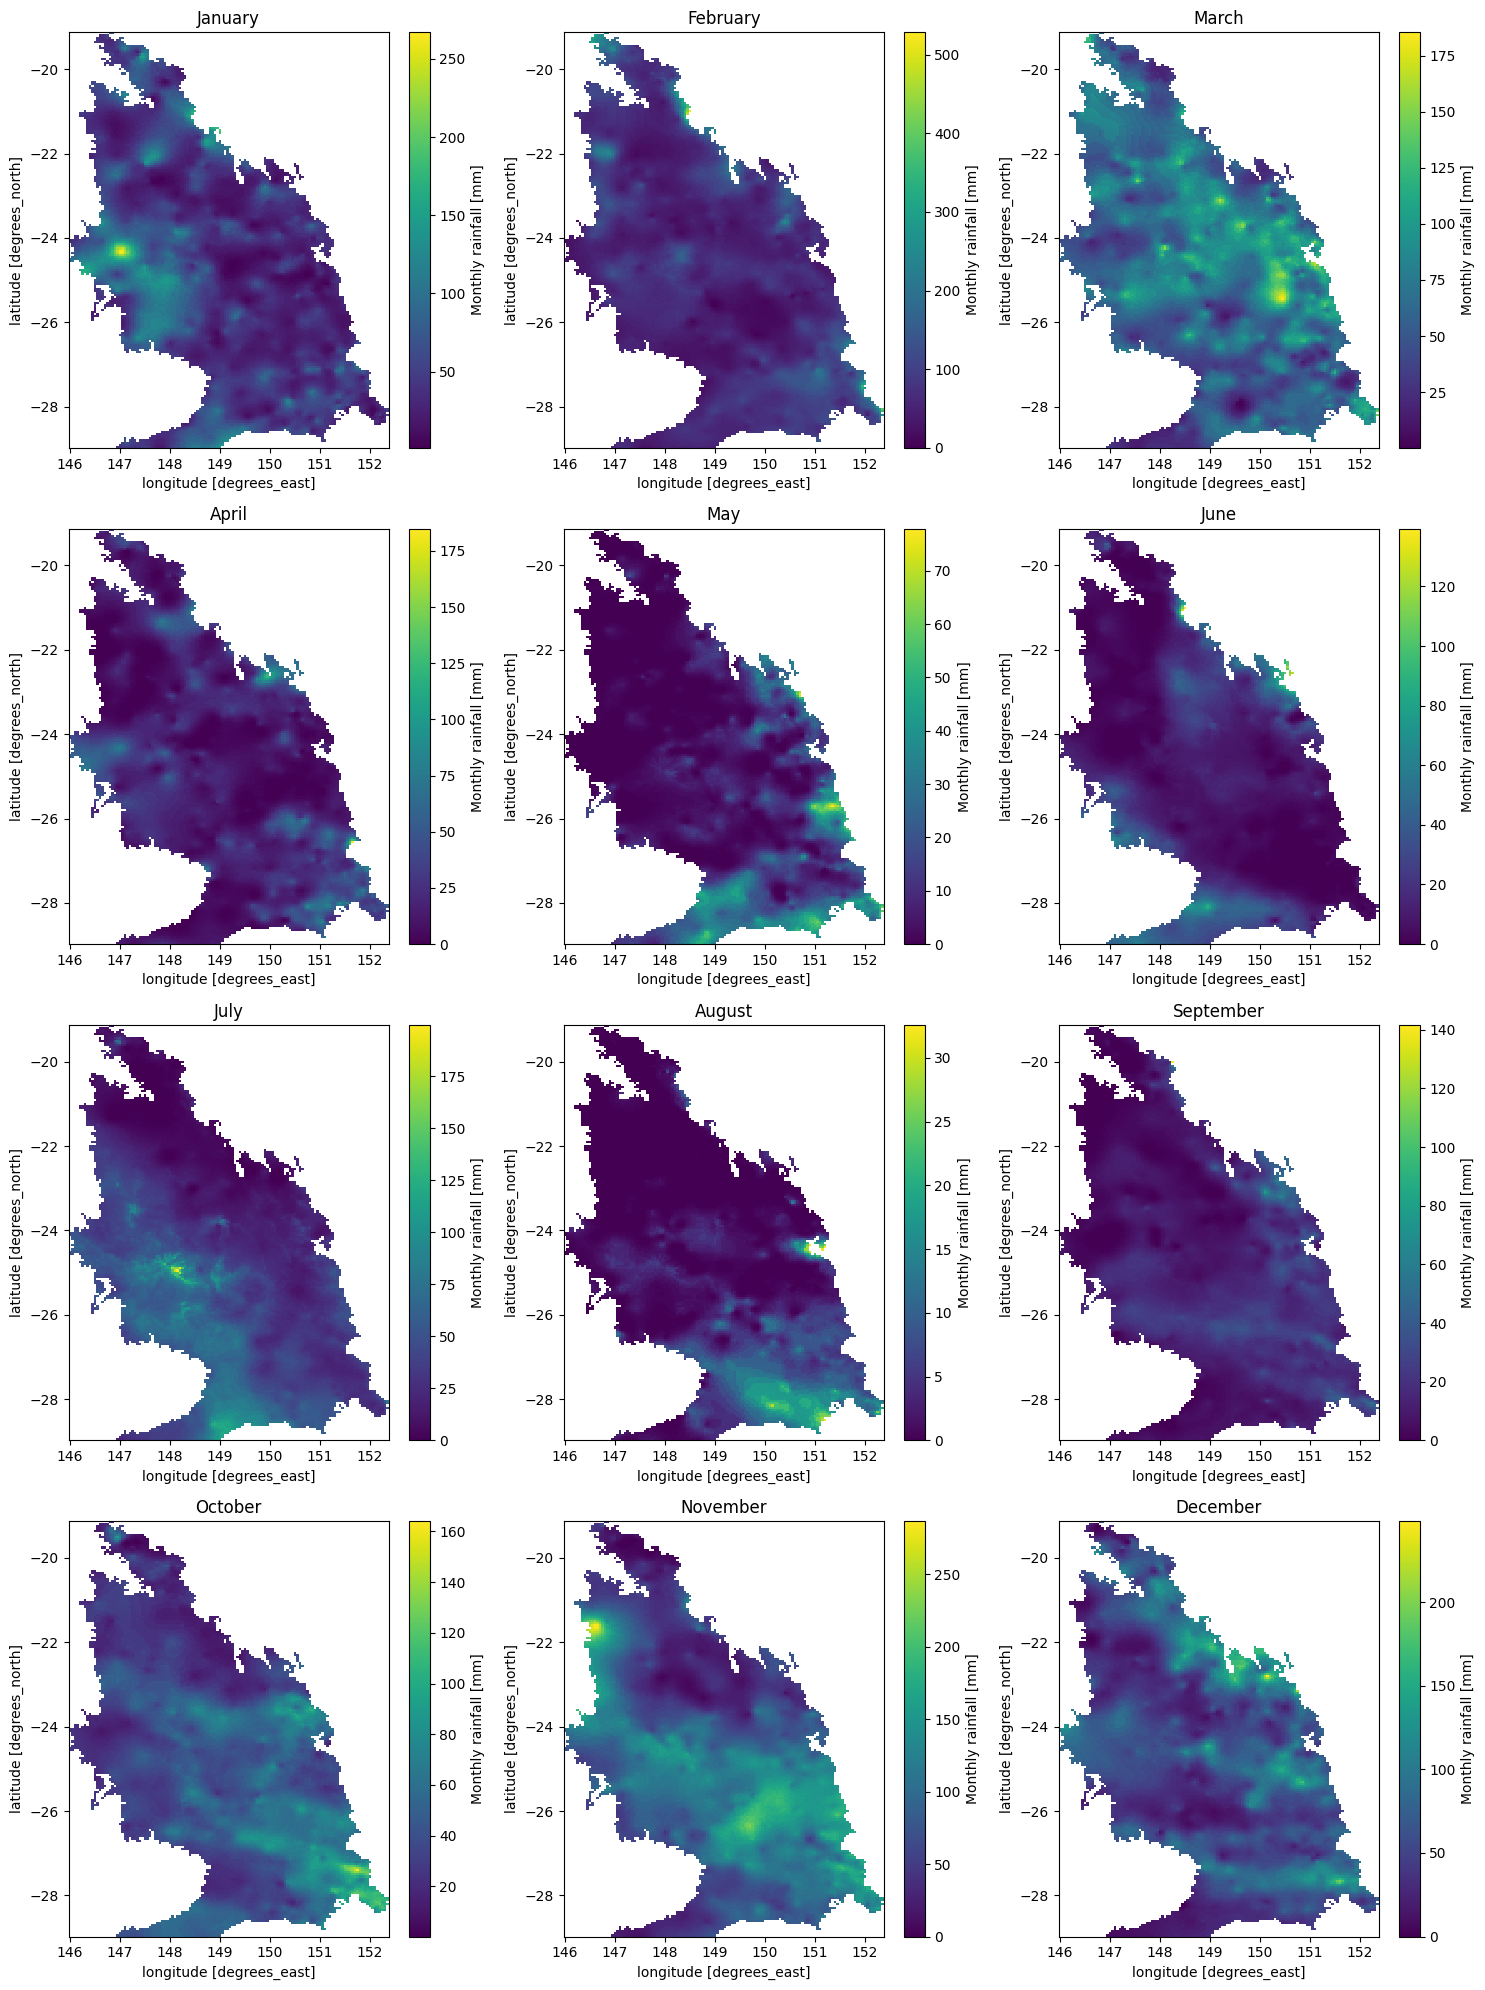

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the monthly radiation data for QLD
ds = xr.open_dataset('Data/Data for SPI/Region Separated Monthly Rainfall/Brigalow_Belt/2001.monthly_rain_Brigalow_Belt_qld.nc')
monthly_radiation = ds['monthly_rain']

# Create a figure and axes for the plot
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))  # Adjust figure size as needed

# Iterate through each month and plot its radiation map
for i, month in enumerate(monthly_radiation.time):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    monthly_radiation.sel(time=month).plot(ax=ax, cmap='viridis') # You can change the colormap
    ax.set_title(month.dt.strftime('%B').item())  # Set month name as title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [3]:
import os
import xarray as xr
import geopandas as gpd
import rioxarray
import matplotlib.pyplot as plt
# Paths
input_dir = 'Data/Data for SPI/Rainfall 2000/Monthly Rainfall'
output_dir = 'Data/Data for SPI/Rainfall 2000/Region Rainfall'
geojson_path = 'Data/QLD Bio Regions/QLD_BioRegions_Separated/Cape_York_Peninsula.geojson'  # path to your QLD geojson file

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Load the QLD boundary
qld_gdf = gpd.read_file(geojson_path)
qld_gdf = qld_gdf.to_crs("EPSG:4326")  # ensure it matches NetCDF projection (WGS84)

# Loop through .nc files
for filename in os.listdir(input_dir):
    if filename.endswith(".nc"):
        filepath = os.path.join(input_dir, filename)
        try:
            # Open dataset with rioxarray
            ds = xr.open_dataset(filepath)
            # variable_name = list(ds.data_vars)[0]
            variable_name = 'monthly_rain'  # Specify the variable name directly
            data = ds[variable_name]

            # Ensure it's georeferenced
            data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
            data.rio.write_crs("EPSG:4326", inplace=True)

            # Clip to QLD geometry
            clipped = data.rio.clip(qld_gdf.geometry, qld_gdf.crs, drop=True)

            # Save to output
            output_filename = os.path.splitext(filename)[0] + "_" + output_dir.split(r'/')[-1] + "_qld.nc"
            output_path = os.path.join(output_dir, output_filename)
            clipped.to_netcdf(output_path)

            print(f"✅ Cropped {filename} to QLD and saved to {output_path}")

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

saved_directory_name = output_dir.split(r'/')[-1]  # Extract the last part of the output directory for naming
end_filename = f"2001.monthly_rain_{saved_directory_name}_qld.nc"

# ds = xr.open_dataset(f'Data/Data for SPI/Region Separated Monthly Rainfall/{saved_directory_name}/{end_filename}')
# monthly_rain = ds['monthly_rain']

# # Create a figure and axes for the plot
# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))  # Adjust figure size as needed

# # Iterate through each month and plot its radiation map
# for i, month in enumerate(monthly_rain.time):
#     row = i // 3
#     col = i % 3
#     ax = axes[row, col]
    
#     monthly_rain.sel(time=month).plot(ax=ax, cmap='viridis') # You can change the colormap
#     ax.set_title(month.dt.strftime('%B').item())  # Set month name as title

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

✅ Cropped 2000.monthly_rain.nc to QLD and saved to Data/Data for SPI/Rainfall 2000/Region Rainfall\2000.monthly_rain_Region Rainfall_qld.nc


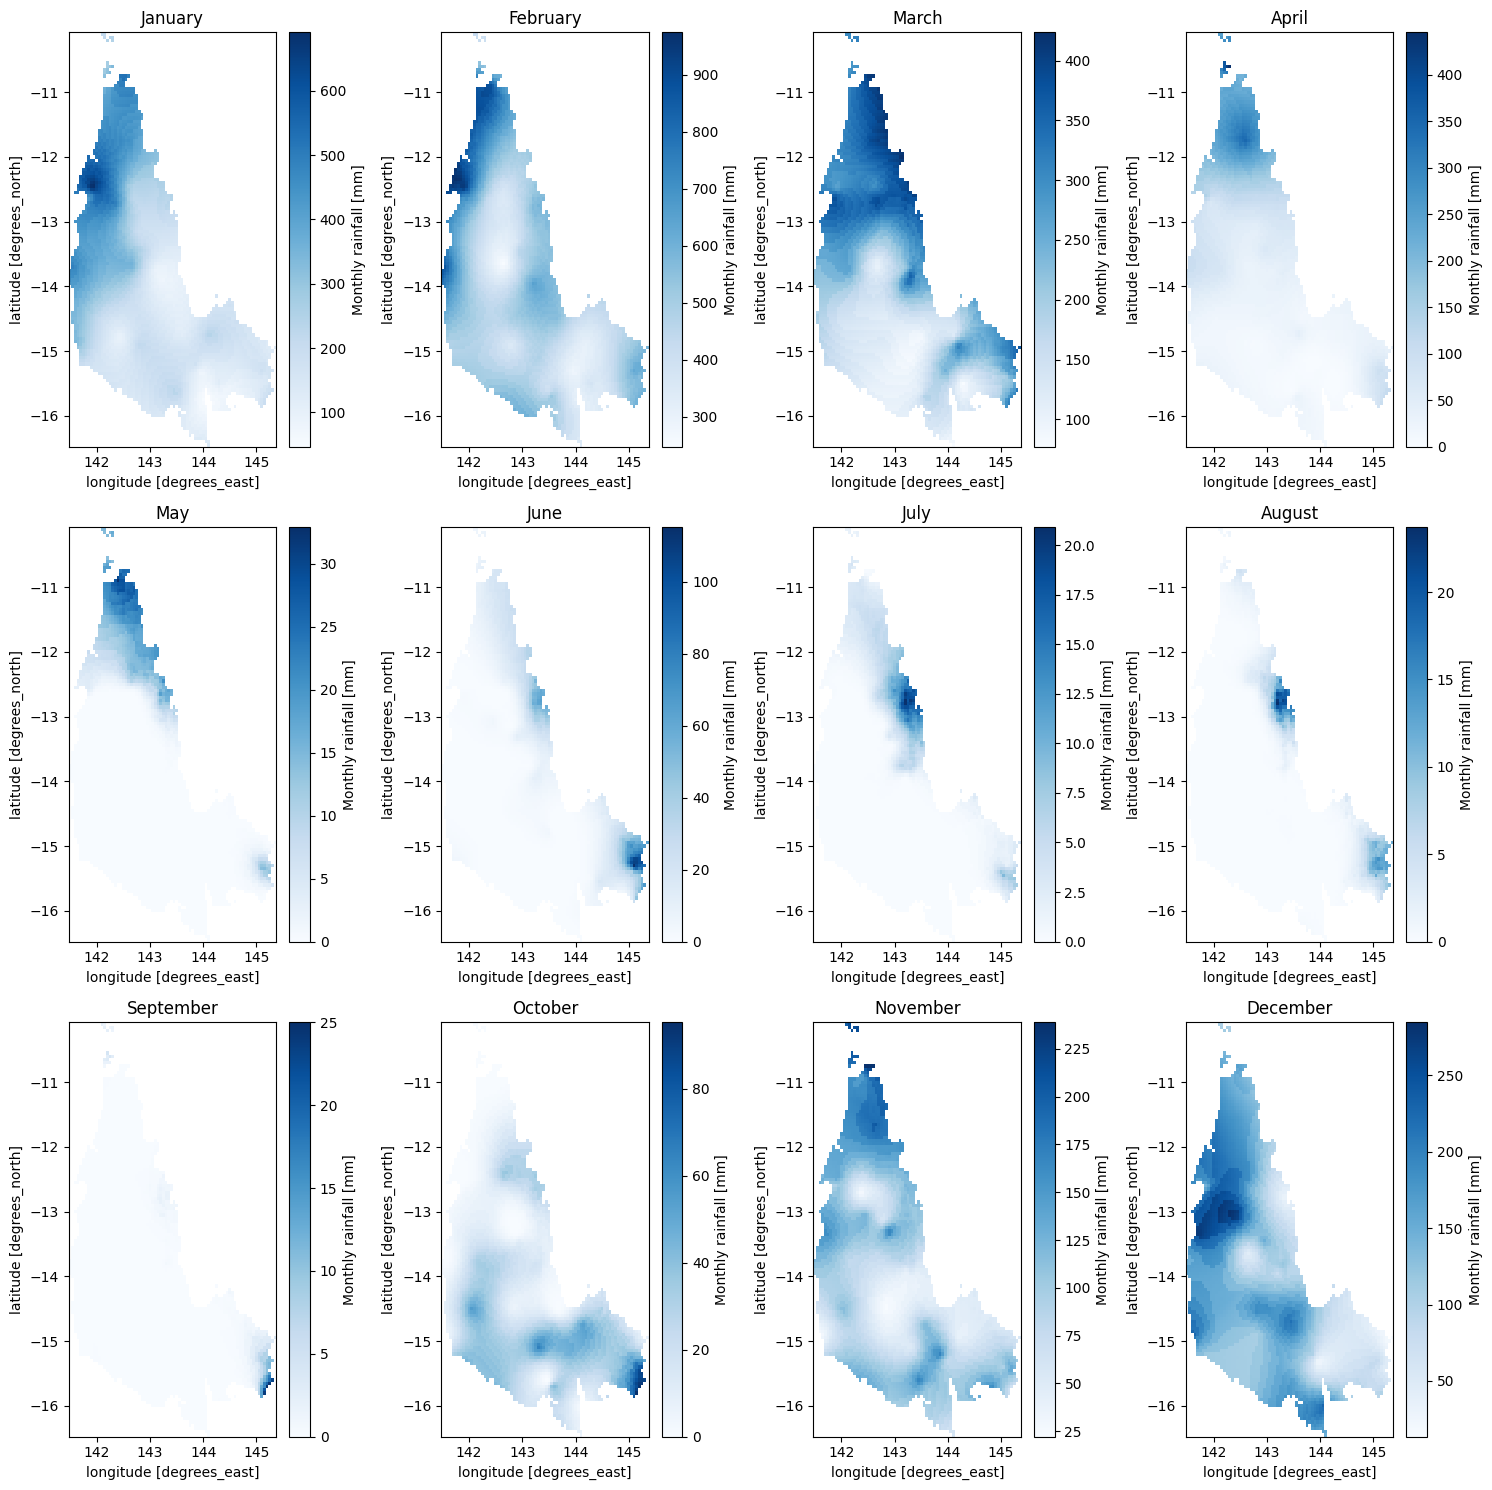

In [18]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset(r'Data\Data for SPI\Region Separated Monthly Rainfall\Cape_York_Peninsula\2001.monthly_rain_Cape_York_Peninsula_qld.nc')
monthly_rain = ds['monthly_rain']

# Create a figure and axes for the plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))  # Adjust figure size as needed

# Iterate through each month and plot its radiation map
for i, month in enumerate(monthly_rain.time):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    monthly_rain.sel(time=month).plot(ax=ax, cmap='Blues') # You can change the colormap
    ax.set_title(month.dt.strftime('%B').item())  # Set month name as title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\Q'
<>:13: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_33680\3193080183.py:13: SyntaxWarning: invalid escape sequence '\Q'
  gdf = gpd.read_file('Data\QLD Bio Regions\QLD_BioRegions_Separated\Cape_York_Peninsula.geojson')
C:\Users\Jspch\AppData\Local\Temp\ipykernel_33680\3193080183.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar


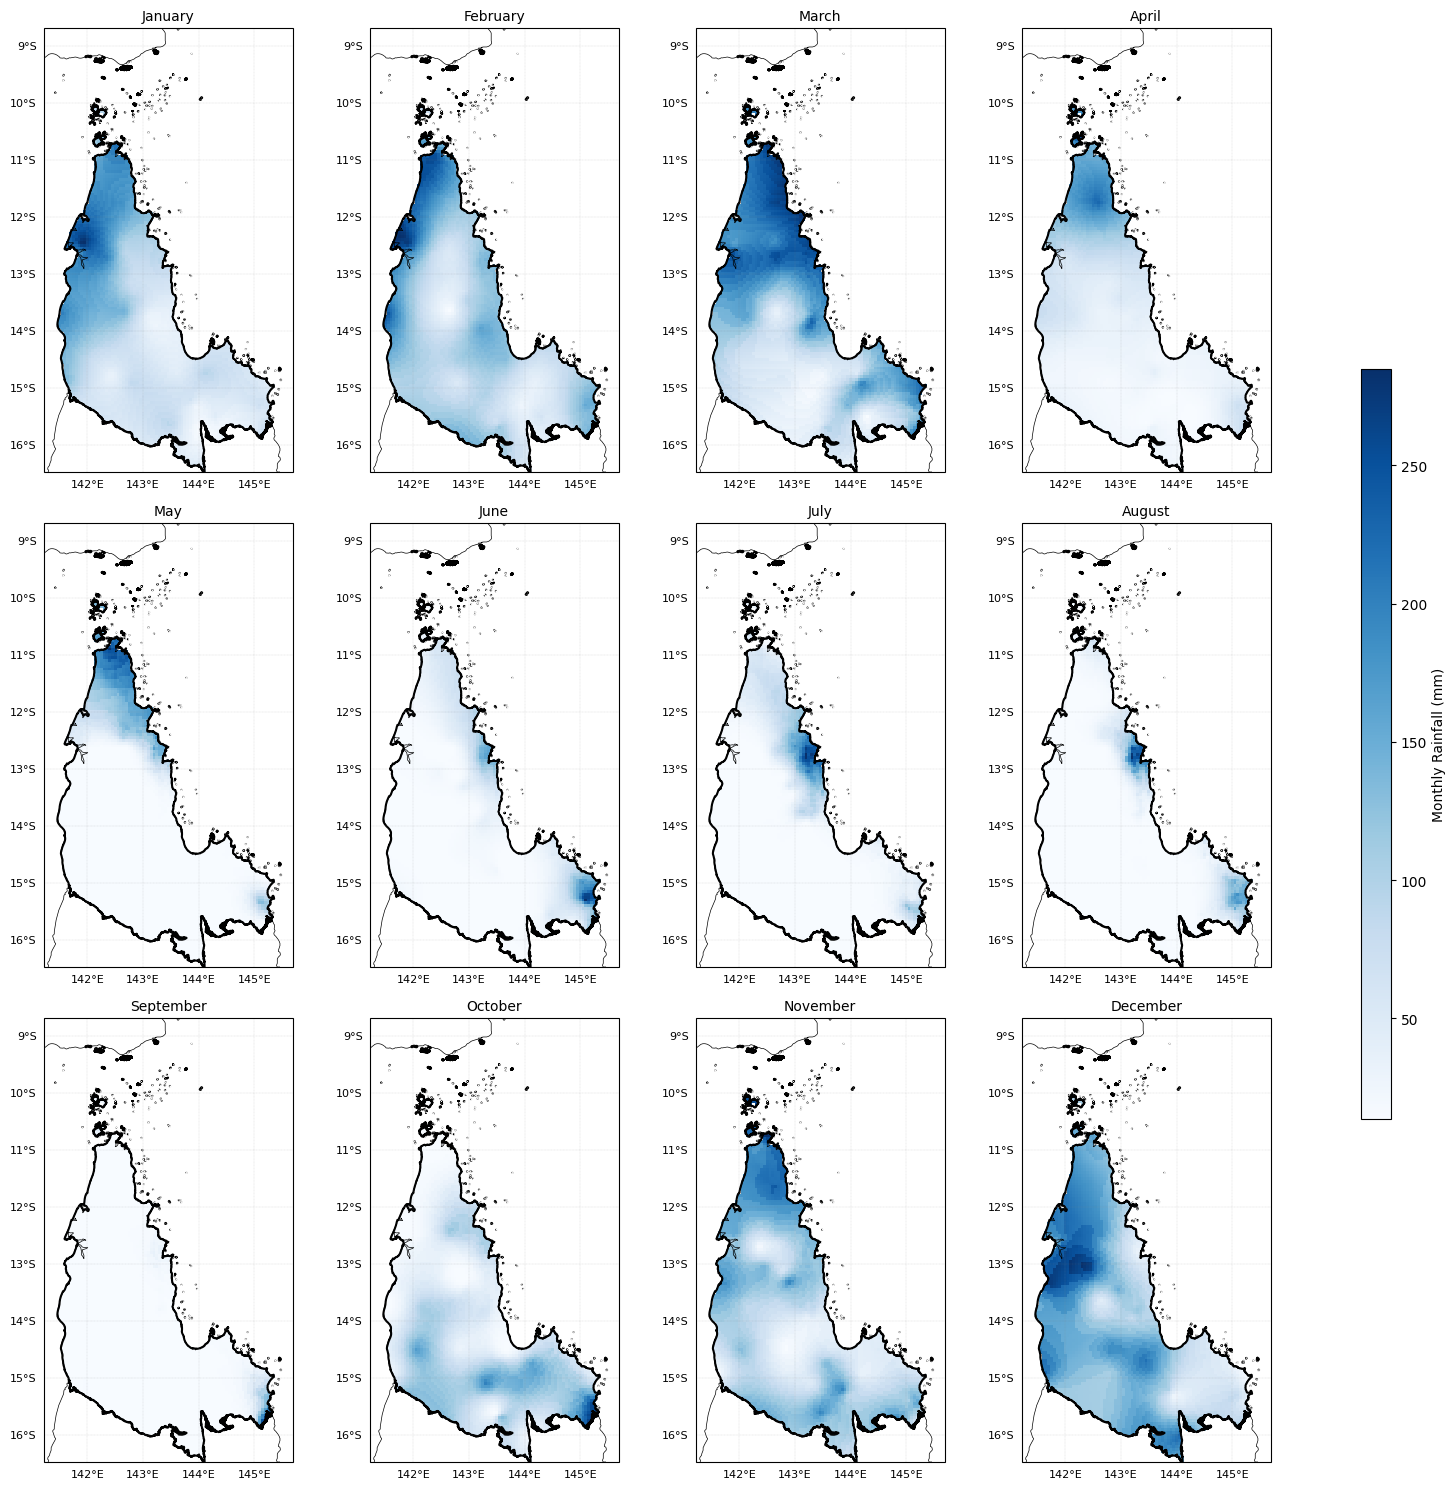

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

# Load data
ds = xr.open_dataset(r'Data\Data for SPI\Region Separated Monthly Rainfall\Cape_York_Peninsula\2001.monthly_rain_Cape_York_Peninsula_qld.nc')
monthly_rain = ds['monthly_rain']

# Load GeoJSON
gdf = gpd.read_file('Data\QLD Bio Regions\QLD_BioRegions_Separated\Cape_York_Peninsula.geojson')
gdf = gdf.to_crs(epsg=4326)

# Plot with geographic projection
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15),
                         subplot_kw={'projection': ccrs.PlateCarree()})

for i, month in enumerate(monthly_rain.time):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Plot rainfall with colorbar
    im = monthly_rain.sel(time=month).plot(ax=ax, cmap='Blues',
                                           transform=ccrs.PlateCarree(),
                                           add_colorbar=False)  # Disable individual bars

    # Overlay GeoJSON border
    gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5, transform=ccrs.PlateCarree())

    # Coastlines and gridlines
    ax.coastlines(resolution='10m', linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),
                      linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

    ax.set_title(month.dt.strftime('%B').item(), fontsize=10)

# Add a single shared colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # [left, bottom, width, height]
plt.colorbar(im, cax=cbar_ax, label='Monthly Rainfall (mm)')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\Q'
<>:11: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_20452\1272474941.py:11: SyntaxWarning: invalid escape sequence '\Q'
  gdf = gpd.read_file('Data\QLD Bio Regions\QLD_BioRegions_Separated\Cape_York_Peninsula.geojson')


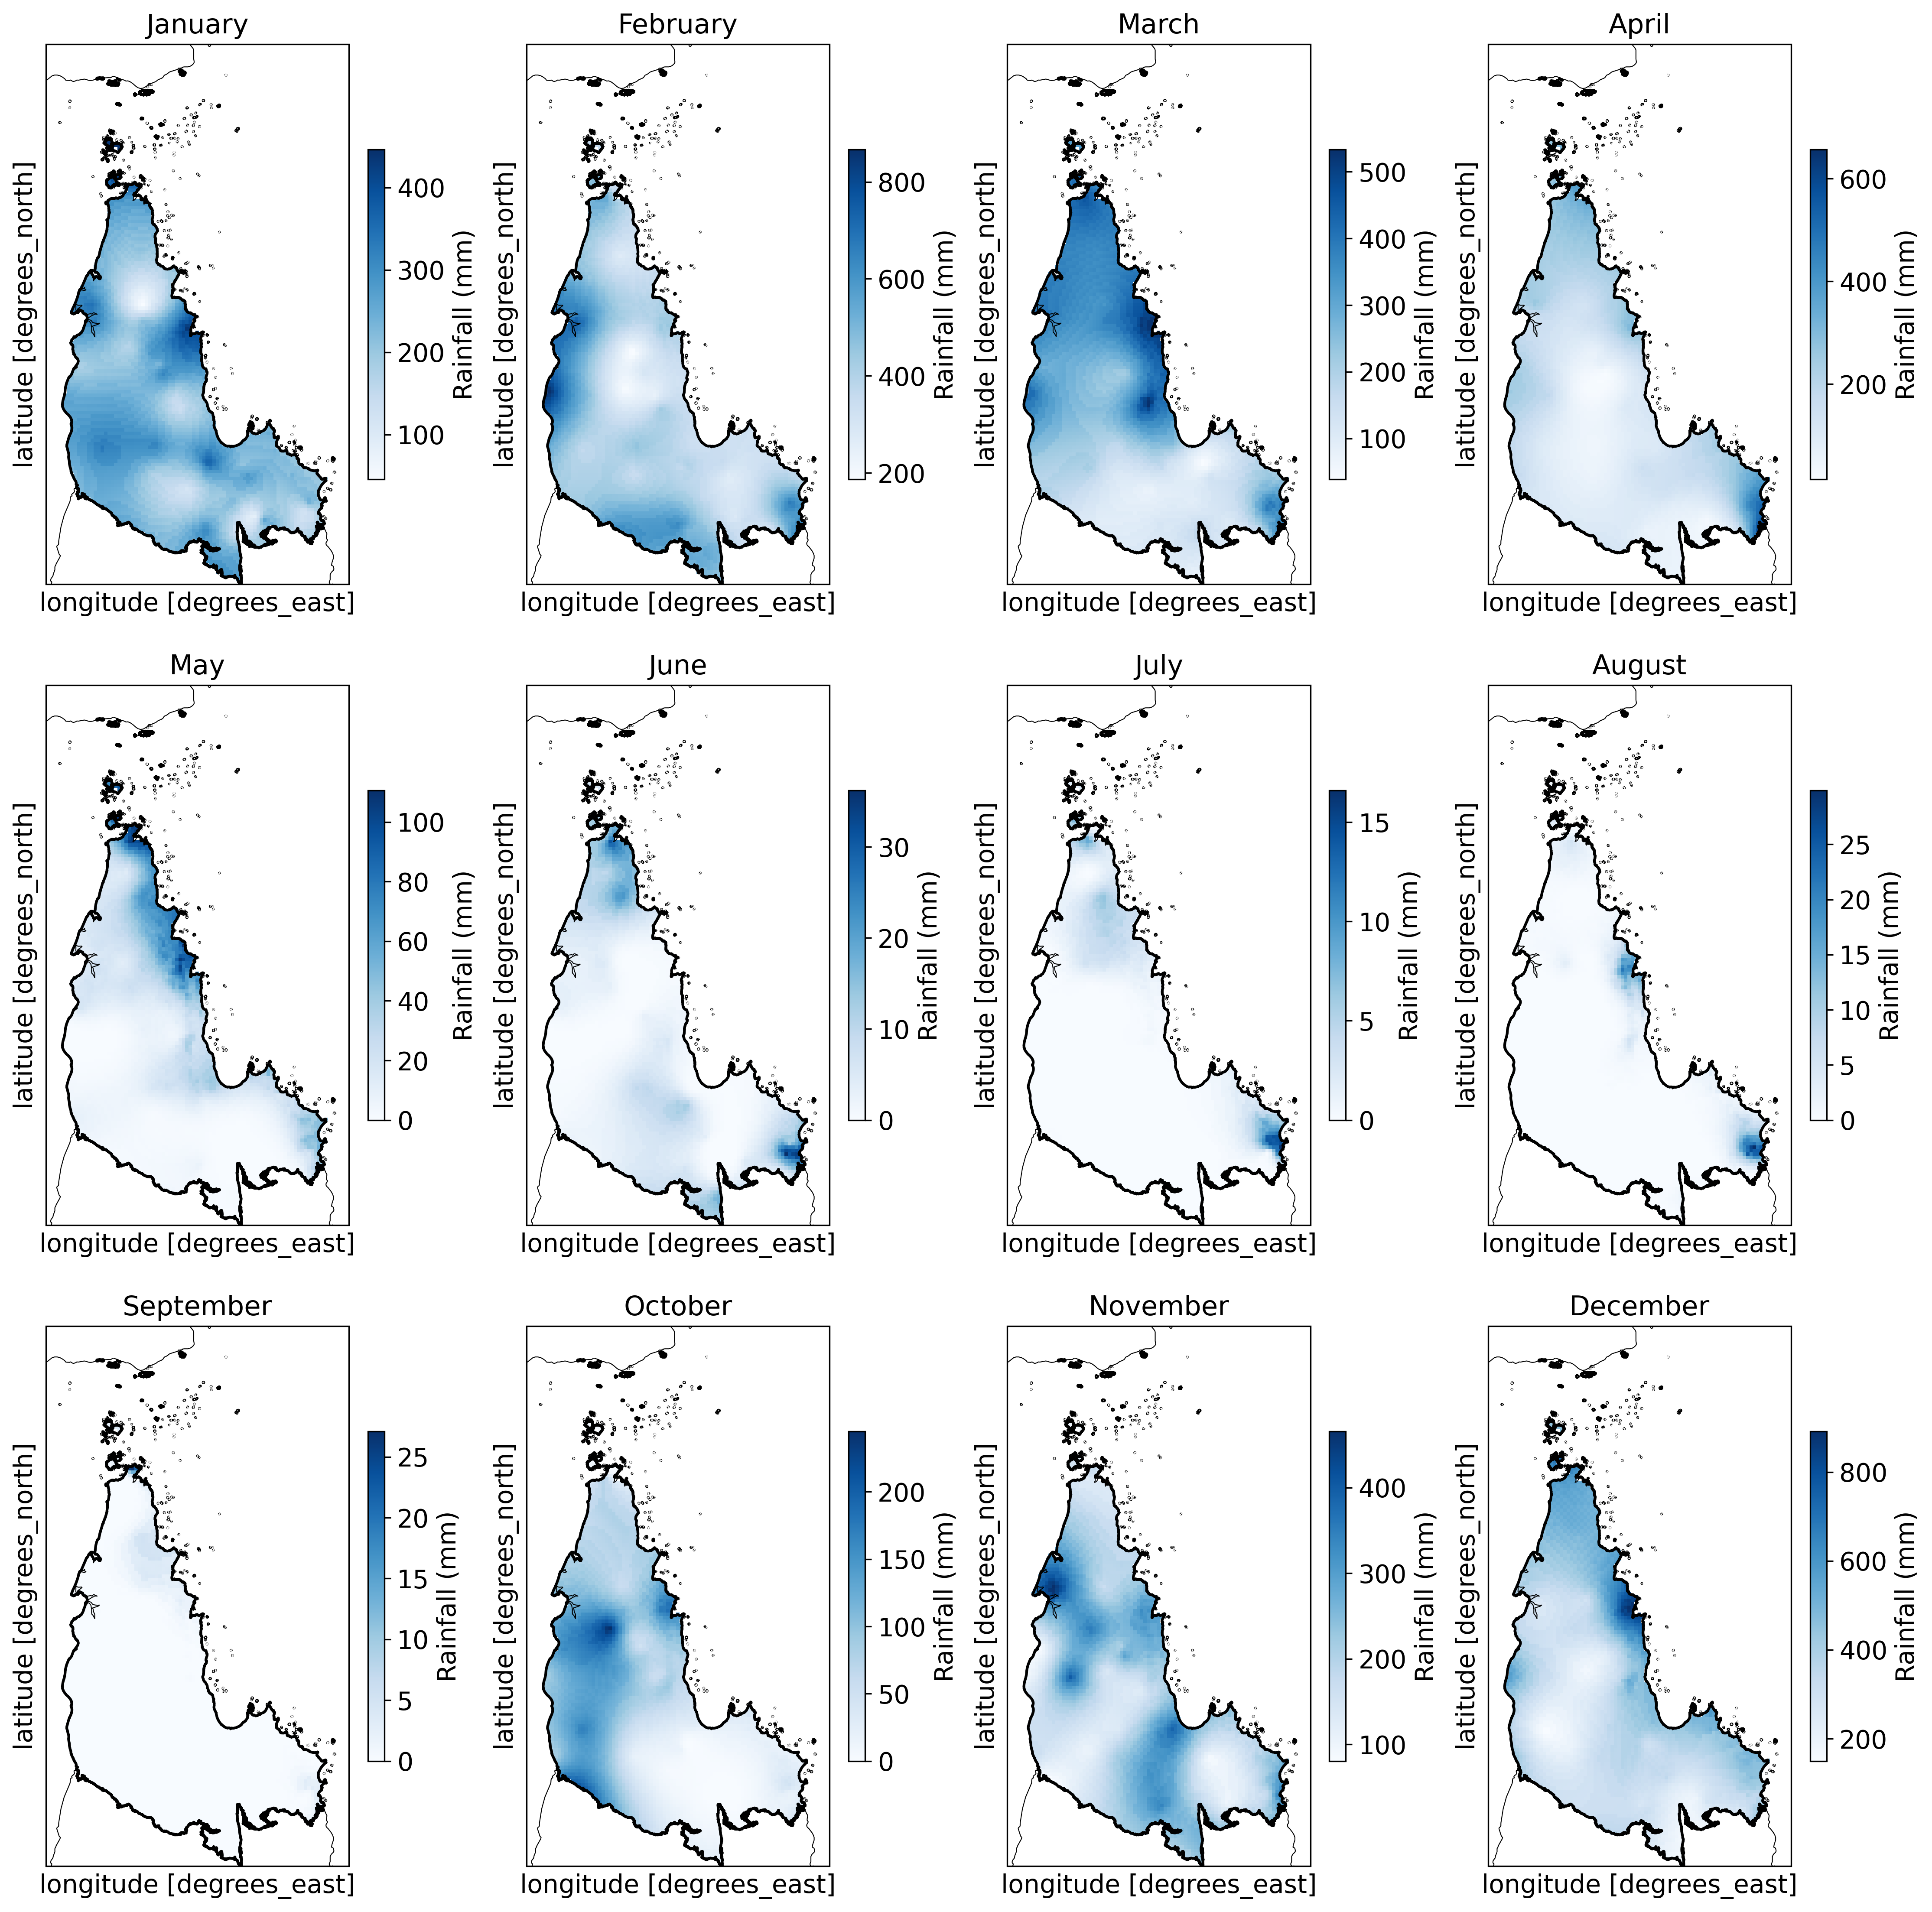

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs

# Load rainfall data
ds = xr.open_dataset(r'Data\Data for SPI\Rainfall 2000\Region Rainfall\2000.monthly_rain_Region Rainfall_qld.nc')
monthly_rain = ds['monthly_rain']

# Load GeoJSON boundary
gdf = gpd.read_file('Data\QLD Bio Regions\QLD_BioRegions_Separated\Cape_York_Peninsula.geojson')
gdf = gdf.to_crs(epsg=4326)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15),
                         subplot_kw={'projection': ccrs.PlateCarree()})

for i, month in enumerate(monthly_rain.time):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Plot with individual colorbar
    monthly_rain.sel(time=month).plot(ax=ax,
                                      cmap='Blues',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=True,
                                      cbar_kwargs={'shrink': 0.6, 'label': 'Rainfall (mm)'})

    # Overlay region boundary
    gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5, transform=ccrs.PlateCarree())

    # Add coastlines and title
    ax.coastlines(resolution='10m', linewidth=0.5)
    ax.set_title(month.dt.strftime('%B').item(), fontsize=10)

    # Optional: turn off tick labels if cluttered
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\Q'
<>:11: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_20452\2478747370.py:11: SyntaxWarning: invalid escape sequence '\Q'
  gdf = gpd.read_file('Data\QLD Bio Regions\QLD_BioRegions_Separated\Cape_York_Peninsula.geojson')


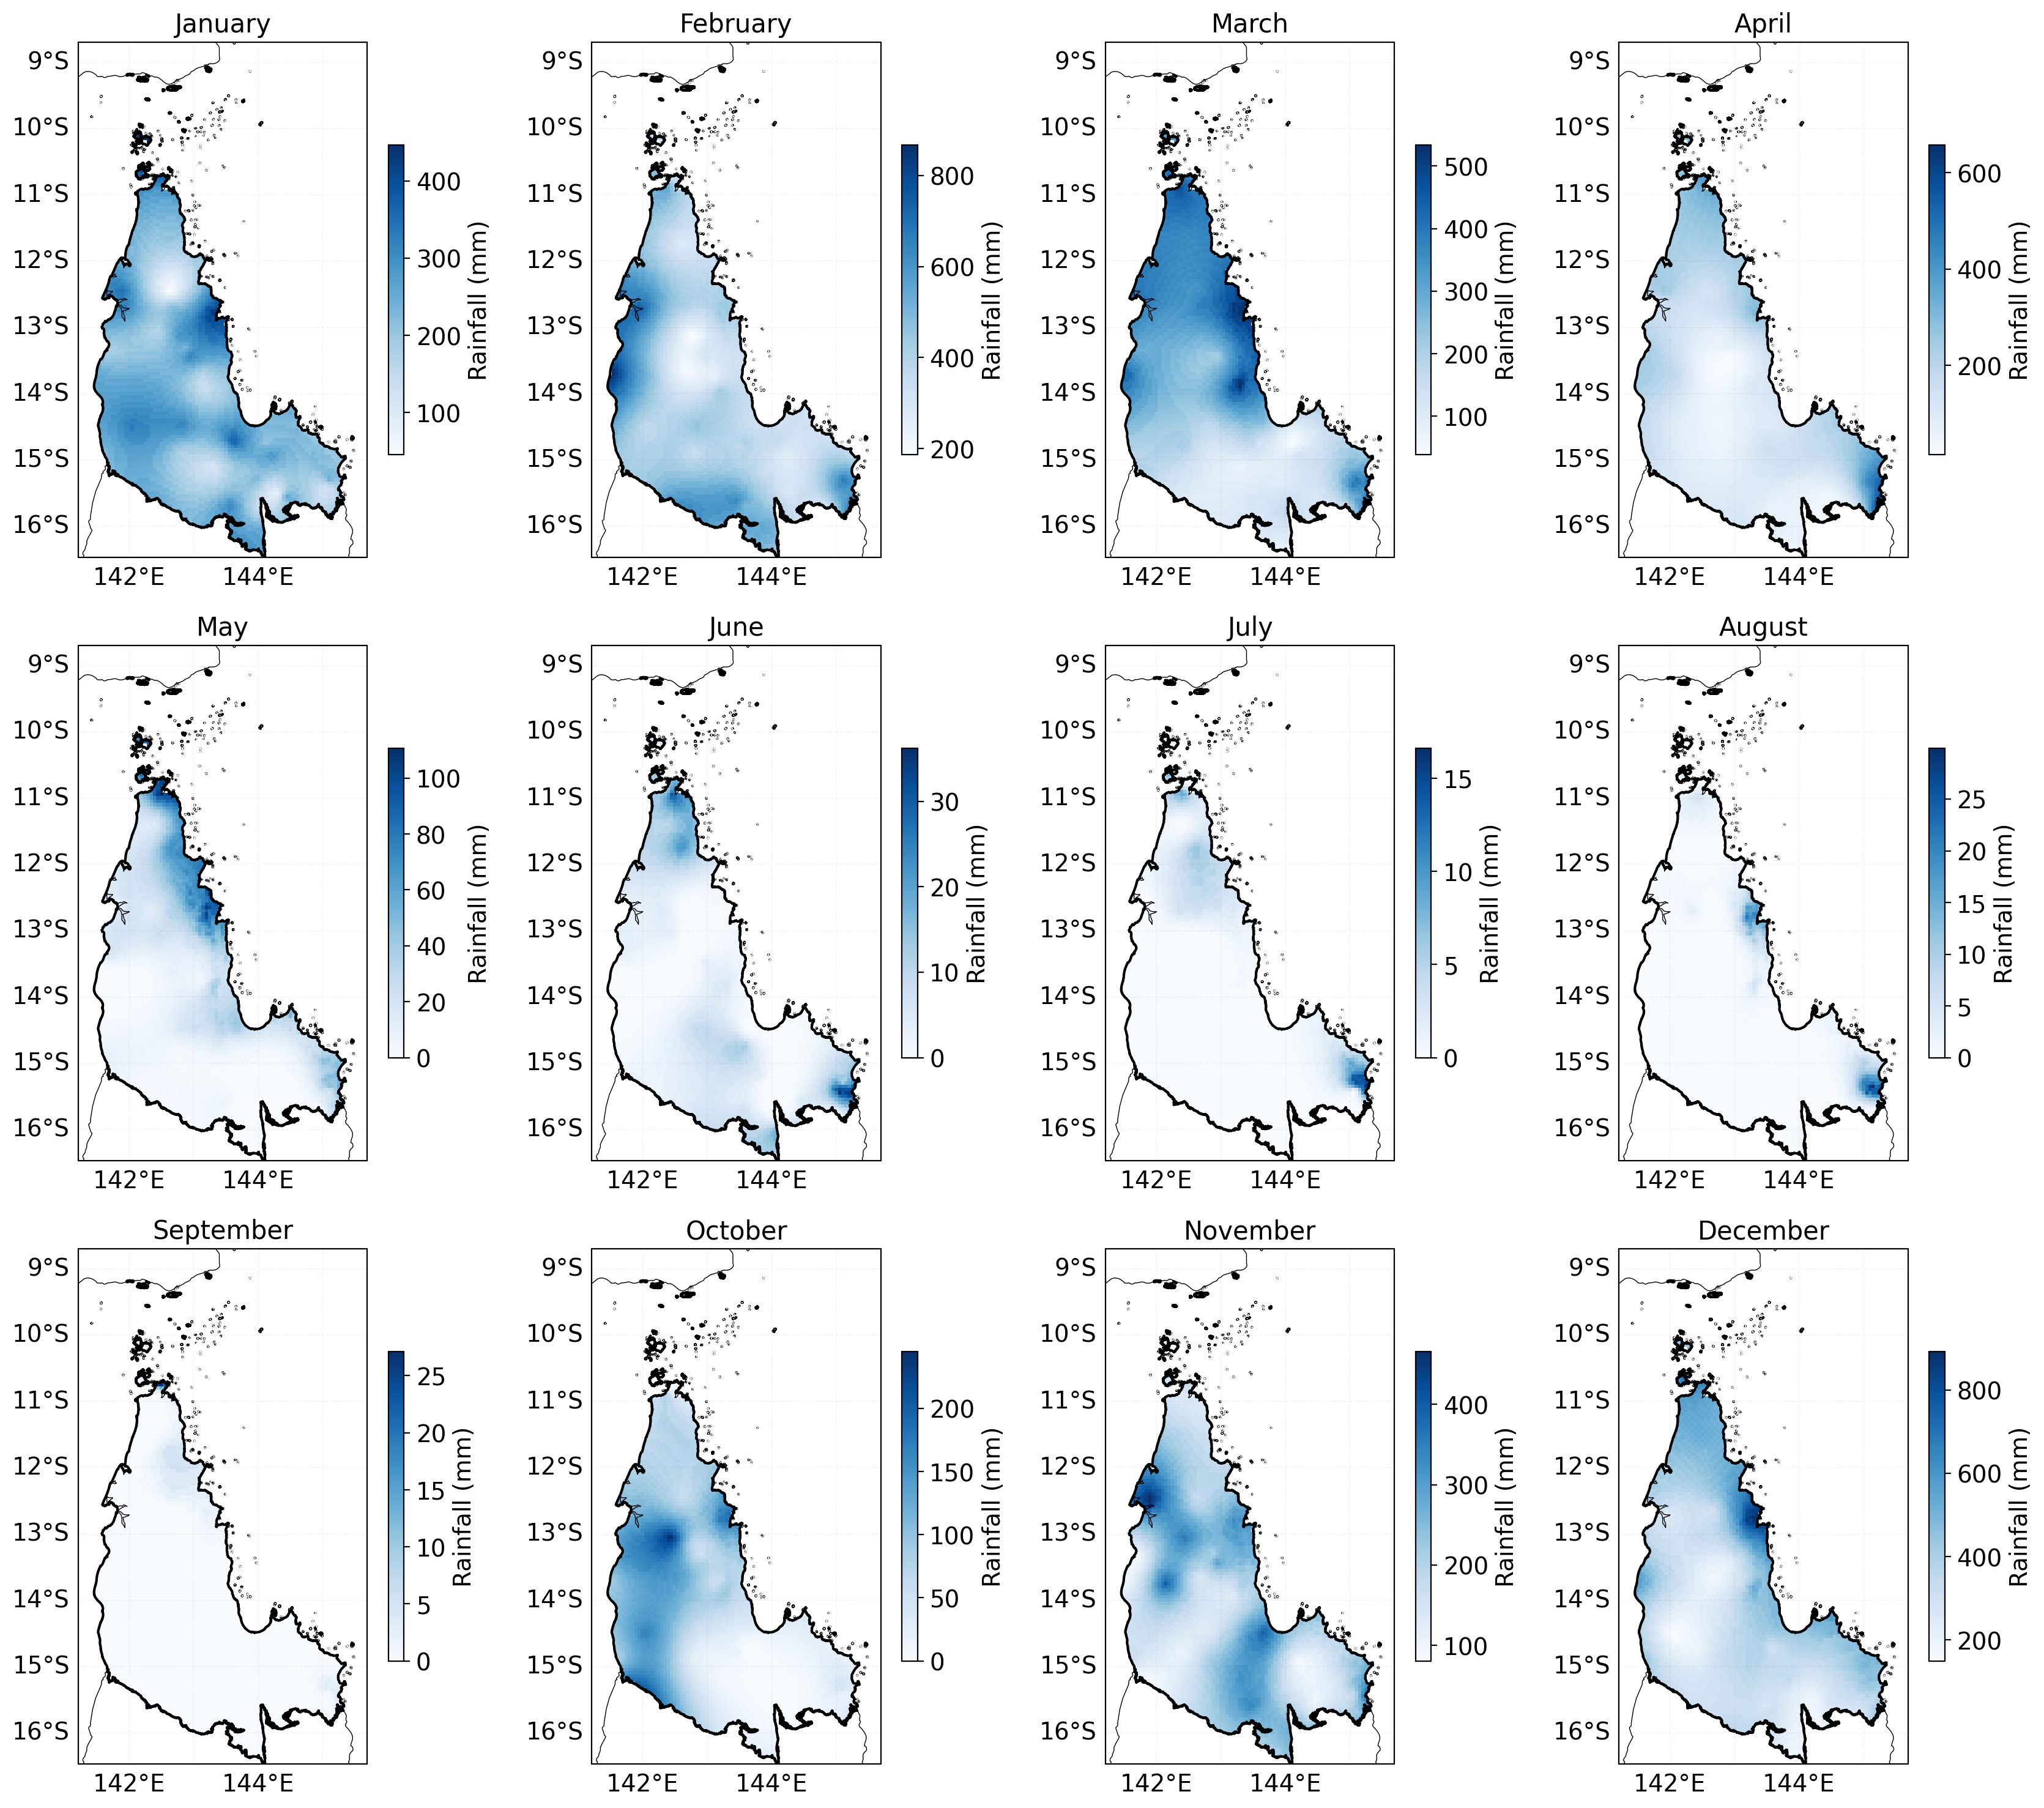

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs

# Load rainfall data
ds = xr.open_dataset(r'Data\Data for SPI\Rainfall 2000\Region Rainfall\2000.monthly_rain_Region Rainfall_qld.nc')
monthly_rain = ds['monthly_rain']

# Load GeoJSON boundary
gdf = gpd.read_file('Data\QLD Bio Regions\QLD_BioRegions_Separated\Cape_York_Peninsula.geojson')
gdf = gdf.to_crs(epsg=4326)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(17, 15),
                         subplot_kw={'projection': ccrs.PlateCarree()}, dpi=200)

for i, month in enumerate(monthly_rain.time):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    monthly_rain.sel(time=month).plot(
        ax=ax,
        cmap='Blues',
        transform=ccrs.PlateCarree(),
        add_colorbar=True,
        cbar_kwargs={'shrink': 0.6, 'label': 'Rainfall (mm)'}
    )

    gdf.boundary.plot(
        ax=ax,
        edgecolor='black',
        linewidth=1.5,
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution='10m', linewidth=0.5)
    ax.set_title(month.dt.strftime('%B').item(), fontsize=15)

    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.5,
        color='gray',
        alpha=0.1,
        linestyle='--'
    )
    gl.top_labels = False
    gl.right_labels = False


plt.tight_layout()
plt.show()
